# Aproximacion de una intregal mediente Método de Monte Carlo Crudo

El método de Monte Carlo es una técnica de simulación que utiliza el muestreo aleatorio para aproximar resultados numéricos. Una de las aplicaciones comunes es la aproximación de integrales. 

Pasos para el método:
1. Definir la función $f(x)$ a integrar.
2. Generar puntos aleatorios uniformemente distribuidos en el intervalo $[a,b]$.
3. Evaluar la función en esos puntos aleatorios.
5. Calcular la media de los valores obtenidos.
6. Multiplicar la media por el ancho del intervalo $(b−a)$.

## Ejemplo 

\begin{equation*}
\begin{aligned}
 I = \int_0^1 \frac{e^{x}-1}{e-1} \quad dx
\end{aligned}
\end{equation*}

Lo resolveremos de dos formas por simulación y analíticamente.

### Simulación 

##### Importación de librerias

In [23]:
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#### Definimos funciones 

* "funcion_x()"
* "experimento()"
* "estabilidad_funcion()"
* "sim()"

In [24]:
def funcion_x(x):
    return (np.exp(x) - 1) / (np.exp(1) -1 ) 

In [25]:
def experimento(n):
    aleatorio = []
    f_aleatorio = []
    media = []

    for i in range(1, n+1):
        aleatorio.append(random.random())
        f_aleatorio.append(funcion_x(aleatorio[i-1]))
        media.append(sum(f_aleatorio)/i)
    return (1/n*(sum(f_aleatorio))), media

In [26]:
def estabilidad_simulacion(ensayos, area):
    plt.plot(ensayos,area)
    plt.xlabel('Número de ensayos')
    plt.ylabel('Aproximación al valor de ')
    plt.show()

In [27]:
def sim(repeticiones): 
    aproximacion = []
    for i in range(repeticiones):
        aproximacion.append(np.mean(experimento(750)[0])) 
    return aproximacion 

#### Llamamos la funciones

Valor de la funcion es:  0.4270403639250893


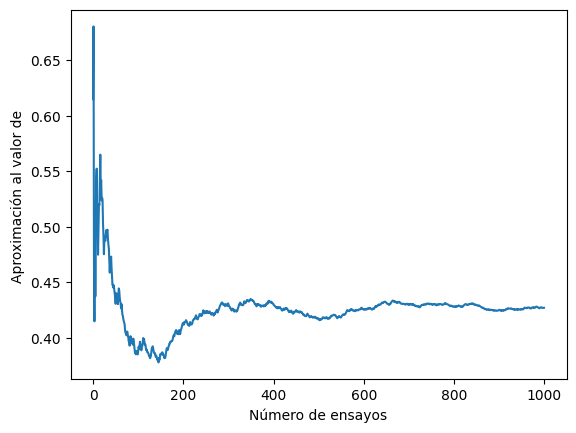

In [28]:
n = 1000

theta = experimento(n)

print("Valor de la funcion es: ",theta[0])

ensayos1 = range(0,n)
estabilidad_simulacion(ensayos1, theta[1])

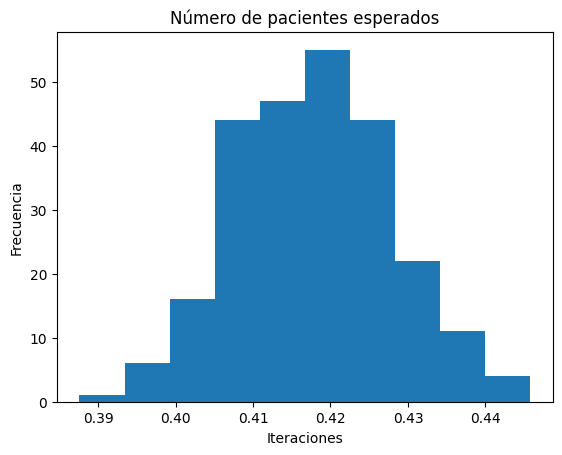

In [31]:
N = 250
simulacion = sim(N)

np.mean(simulacion)

plt.hist(simulacion) #Grafica las frecuencias de la aproximación a la probabilidad de las N simualciones con 750 experiementos cada una.
plt.xlabel('Iteraciones')
plt.ylabel('Frecuencia')
plt.title('Número de pacientes esperados')
plt.show()

# **Analiticamente**

\begin{equation*}
\begin{aligned}
 I = \int_0^1 \frac{e^{x}-1}{e-1} \quad dx
\end{aligned}
\end{equation*}
Resolviendo:
\begin{equation*}
\begin{aligned}
\int_0^1 \frac{e^{x}-1}{e-1} \quad dx &= \frac{1}{e-1} \left[\int_0^1 e^x \quad dx - \int_0^1 1 \quad dx \right]\\ 
&= \frac{1}{e-1} \left(e^x \bigg|_0^1 - x \bigg|_0^1 \right)\\
&= \frac{1}{e-1} \left( e-e^0-1-0 \right)\\
&= \frac{1}{e-1} (e-2)\\
&= \frac{e-2}{e-1}\\
\therefore I &= \frac{e-2}{e-1} \approx 0.418023
\end{aligned}
\end{equation*}
